<a href="https://colab.research.google.com/github/Aisha-Hagar/WideBot_Task2/blob/main/WideBot_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

Using this dataset, you are supposed to prepare an Exploratory Data Analysis (EDA) report in PDF format that shows at least 3 different insights about this data (number of examples per class, top frequent n-grams generally and per class, lengths of examples in words and letters, ….) . Feel free to show your insights in a good format (description, tables, charts, …).
Note that you can prepare the PDF manually after generating the analytics in any other format (CSV, xls, doc), …).
Note: Use stories data only (not comments).

In [27]:
!pip install arabic_reshaper

In [28]:
!pip install python-bidi

In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.probability import FreqDist

In [30]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
!mkdir archive
!unzip archive.zip -d archive

Archive:  archive.zip
  inflating: archive/comments_art-et-culture.csv  
  inflating: archive/comments_economie.csv  
  inflating: archive/comments_faits-divers.csv  
  inflating: archive/comments_marocains-du-monde.csv  
  inflating: archive/comments_medias.csv  
  inflating: archive/comments_orbites.csv  
  inflating: archive/comments_politique.csv  
  inflating: archive/comments_regions.csv  
  inflating: archive/comments_societe.csv  
  inflating: archive/comments_sport.csv  
  inflating: archive/comments_tamazight.csv  
  inflating: archive/stories_art-et-culture.csv  
  inflating: archive/stories_economie.csv  
  inflating: archive/stories_faits-divers.csv  
  inflating: archive/stories_marocains-du-monde.csv  
  inflating: archive/stories_medias.csv  
  inflating: archive/stories_orbites.csv  
  inflating: archive/stories_politique.csv  
  inflating: archive/stories_regions.csv  
  inflating: archive/stories_societe.csv  
  inflating: archive/stories_sport.csv  
  inflating: arc

In [2]:
def readFiles(path, prefix):
  files = [i for i in os.listdir(path) if os.path.isfile(os.path.join(path,i)) and i.startswith(prefix)]
  df = pd.concat((pd.read_csv(os.path.join(path,f), index_col=0) for f in files), ignore_index=True)
  return df

In [3]:
stories = readFiles('archive', 'stories')
comments = readFiles('archive', 'comments')

In [4]:
stories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11000 non-null  object
 1   title   11000 non-null  object
 2   date    11000 non-null  object
 3   author  11000 non-null  object
 4   story   11000 non-null  object
 5   topic   11000 non-null  object
dtypes: object(6)
memory usage: 515.8+ KB


In [5]:
stories

,id,title,date,author,story,topic
0,3a7f2f5e04dd11eba84c646e69d991ea,"رسمياً .. الجولة الثانية من ""المفاوضات الليبية...",الجمعة 02 أكتوبر 2020 - 16:00,هسبريس - عبد الرحيم العسري,أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...,politique
1,3b2663cc04dd11ebb293646e69d991ea,رئيس الحكومة يلتزم بحماية حقوق الشغيلة وإحداث ...,الجمعة 02 أكتوبر 2020 - 13:00,هسبريس - محمد الراجي (صور: منير محيمدات),شدد رئيس الحكومة، سعد الدين العثماني، على أن ا...,politique
2,3bc8521c04dd11ebb541646e69d991ea,"هل تشكل ""المعارضة"" بديلا عن أحزاب الأغلبية في ...",الجمعة 02 أكتوبر 2020 - 09:00,هسبريس من الرباط,يكاد يكون هناك إجماع على فشل الحكومة في تدبير ...,politique
3,3c5c092e04dd11eba4b7646e69d991ea,فرق مجلس النواب تستعد للدخول البرلماني الجديد,الجمعة 02 أكتوبر 2020 - 08:38,هسبريس من الرباط,عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...,politique
4,3d126e6404dd11eba070646e69d991ea,"الرباط تُنشِّط ""الدبلوماسية الروحية"" تجاه الأز...",الجمعة 02 أكتوبر 2020 - 05:00,هسبريس - مصطفى شاكري,تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...,politique
...,...,...,...,...,...,...
10995,285b115e04e911ebafee646e69d991ea,"64 إصابة بـ""كوفيد-19"" في صفوف الممرضين",الاثنين 13 يوليوز 2020 - 23:00,أيوب صدور من تطوان,قالت حركة الممرضين وتقنيي الصحة بالمغرب، إن عد...,societe
10996,295312fa04e911ebaaa1646e69d991ea,حموشي يؤشّر على تعيينات بمصالح الأمن الوطني‎,الاثنين 13 يوليوز 2020 - 22:56,هسبريس من الرباط,أشّر المدير العام للأمن الوطني، عبد اللطيف حمو...,societe
10997,2aadb58004e911eb98d9646e69d991ea,عدد الجلسات عن بعد بلغ 362 جلسة خلال 5 أيام,الاثنين 13 يوليوز 2020 - 18:15,هسبريس من الرباط,"قال المجلس الأعلى للسلطة القضائية إننا ""نسجل ب...",societe
10998,2bd9849c04e911ebb053646e69d991ea,المغرب يسجل 191 إصابة جديدة مؤكدة بكورونا خلال...,الاثنين 13 يوليوز 2020 - 18:10,هسبريس من الرباط,كشفت وزارة الصحة، اليوم الاثنين، تسجيل 191 حال...,societe


In [6]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311515 entries, 0 to 311514
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   postId   311515 non-null  object
 1   comment  311514 non-null  object
 2   score    311515 non-null  int64 
 3   topic    311515 non-null  object
dtypes: int64(1), object(3)
memory usage: 9.5+ MB


In [7]:
#Drop rows with missing values
comments.dropna(inplace=True)

In [8]:
comments

,postId,comment,score,topic
0,f06aa998054e11eba66e646e69d991ea,علينا الاهتمام ببيت الابحاث العلمية و المختبرا...,-9,art-et-culture
1,f06aa998054e11eba66e646e69d991ea,بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...,5,art-et-culture
2,f06aa998054e11eba66e646e69d991ea,مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة ا...,4,art-et-culture
3,f06aa998054e11eba66e646e69d991ea,شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...,5,art-et-culture
4,f1cf1b9c054e11ebb718646e69d991ea,كل من عليها فان ويبقى وجه ربك ذو الجلال والإكر...,13,art-et-culture
...,...,...,...,...
311510,aa9adb7004f311ebb234646e69d991ea,انسان صادق وطني نمودج يقتدى به. ا قترحه سفيرا ...,27,marocains-du-monde
311511,aa9adb7004f311ebb234646e69d991ea,"Jawad is an example of hard work, discipline a...",12,marocains-du-monde
311512,aa9adb7004f311ebb234646e69d991ea,يقول المثل. من اين ذلك.ااشبل من ذاك الاسد انا ...,11,marocains-du-monde
311513,aa9adb7004f311ebb234646e69d991ea,د. جواد الخراز ممن يجمعون بين تواضع الكبار وشم...,13,marocains-du-monde


#**Number of Examples per Class**

In [9]:
def barPlot(df, group, count,title):
  y = df.groupby(by=df[group])[count].count()
  plt.figure(figsize=(30, 10))
  plt.title(title)
  sns.barplot(x = y.index, y = y)

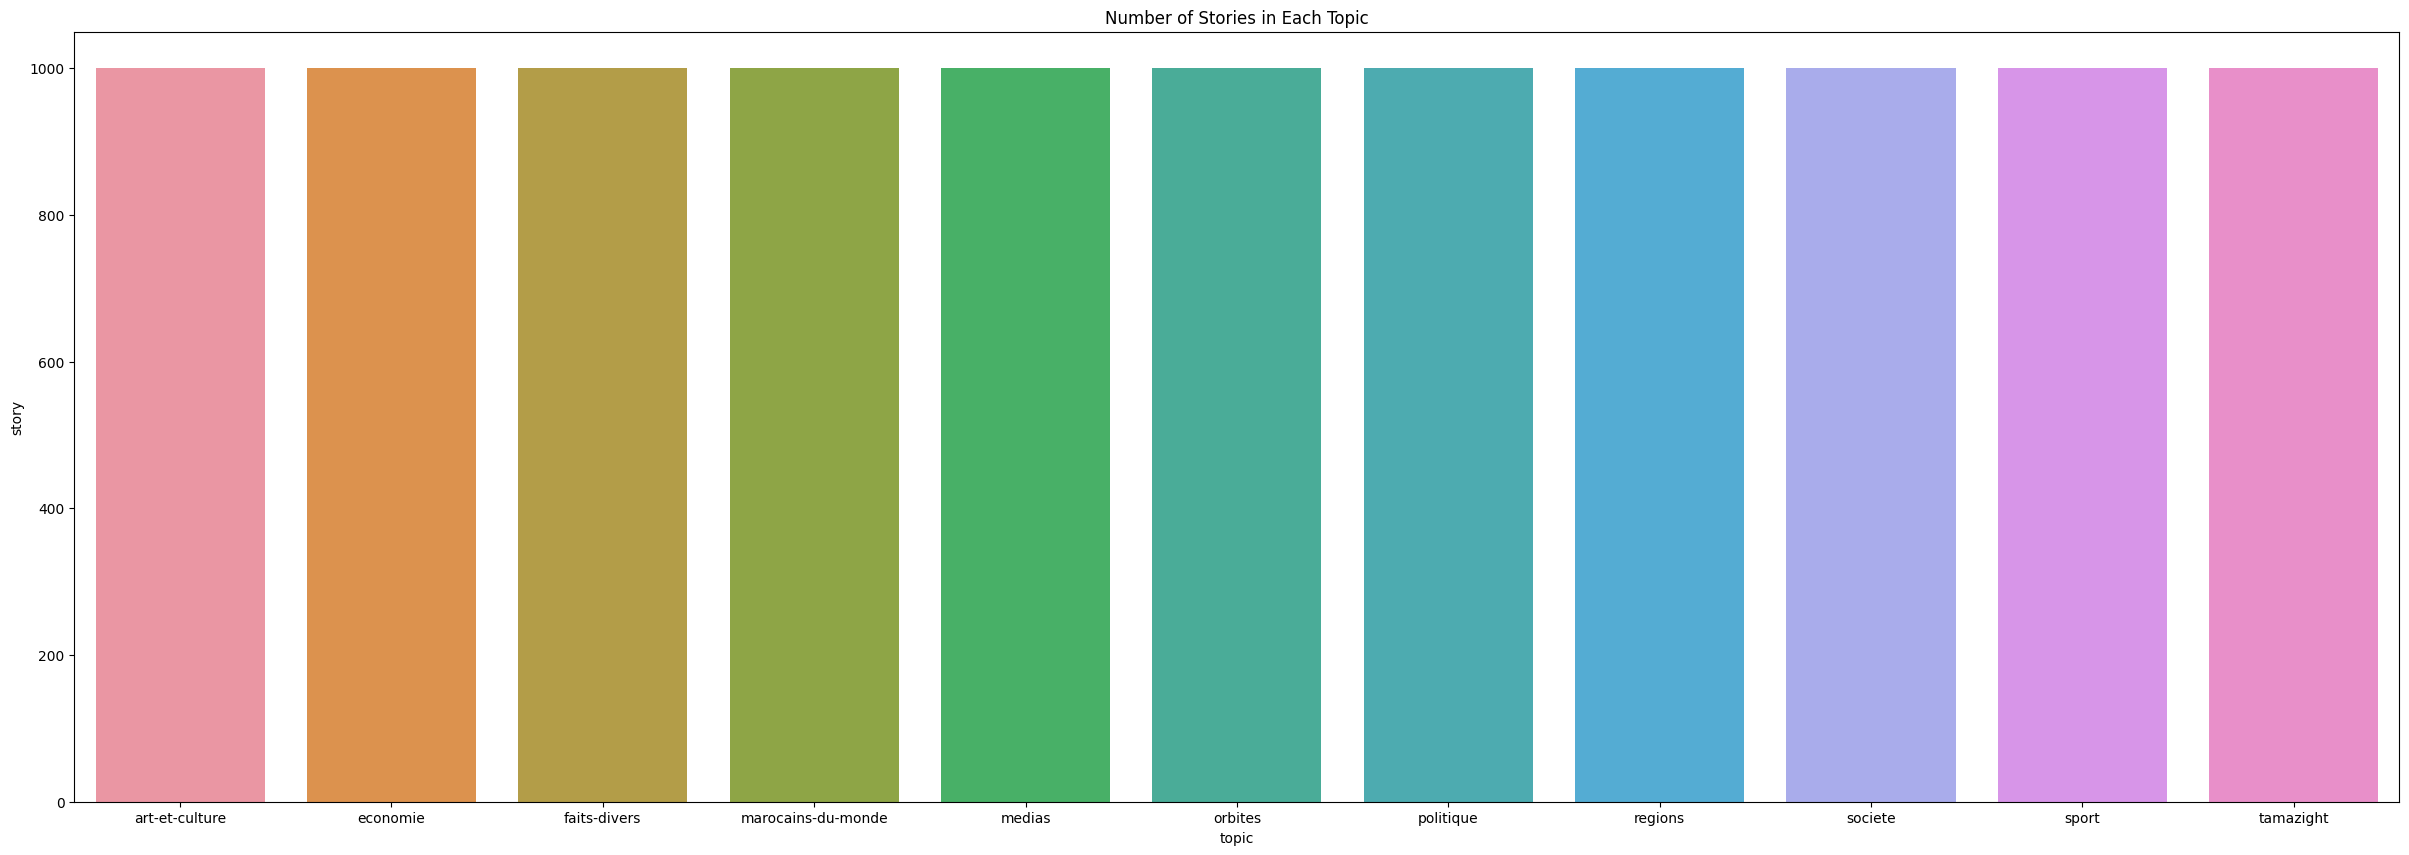

In [10]:
barPlot(stories, 'topic', 'story', 'Number of Stories in Each Topic')

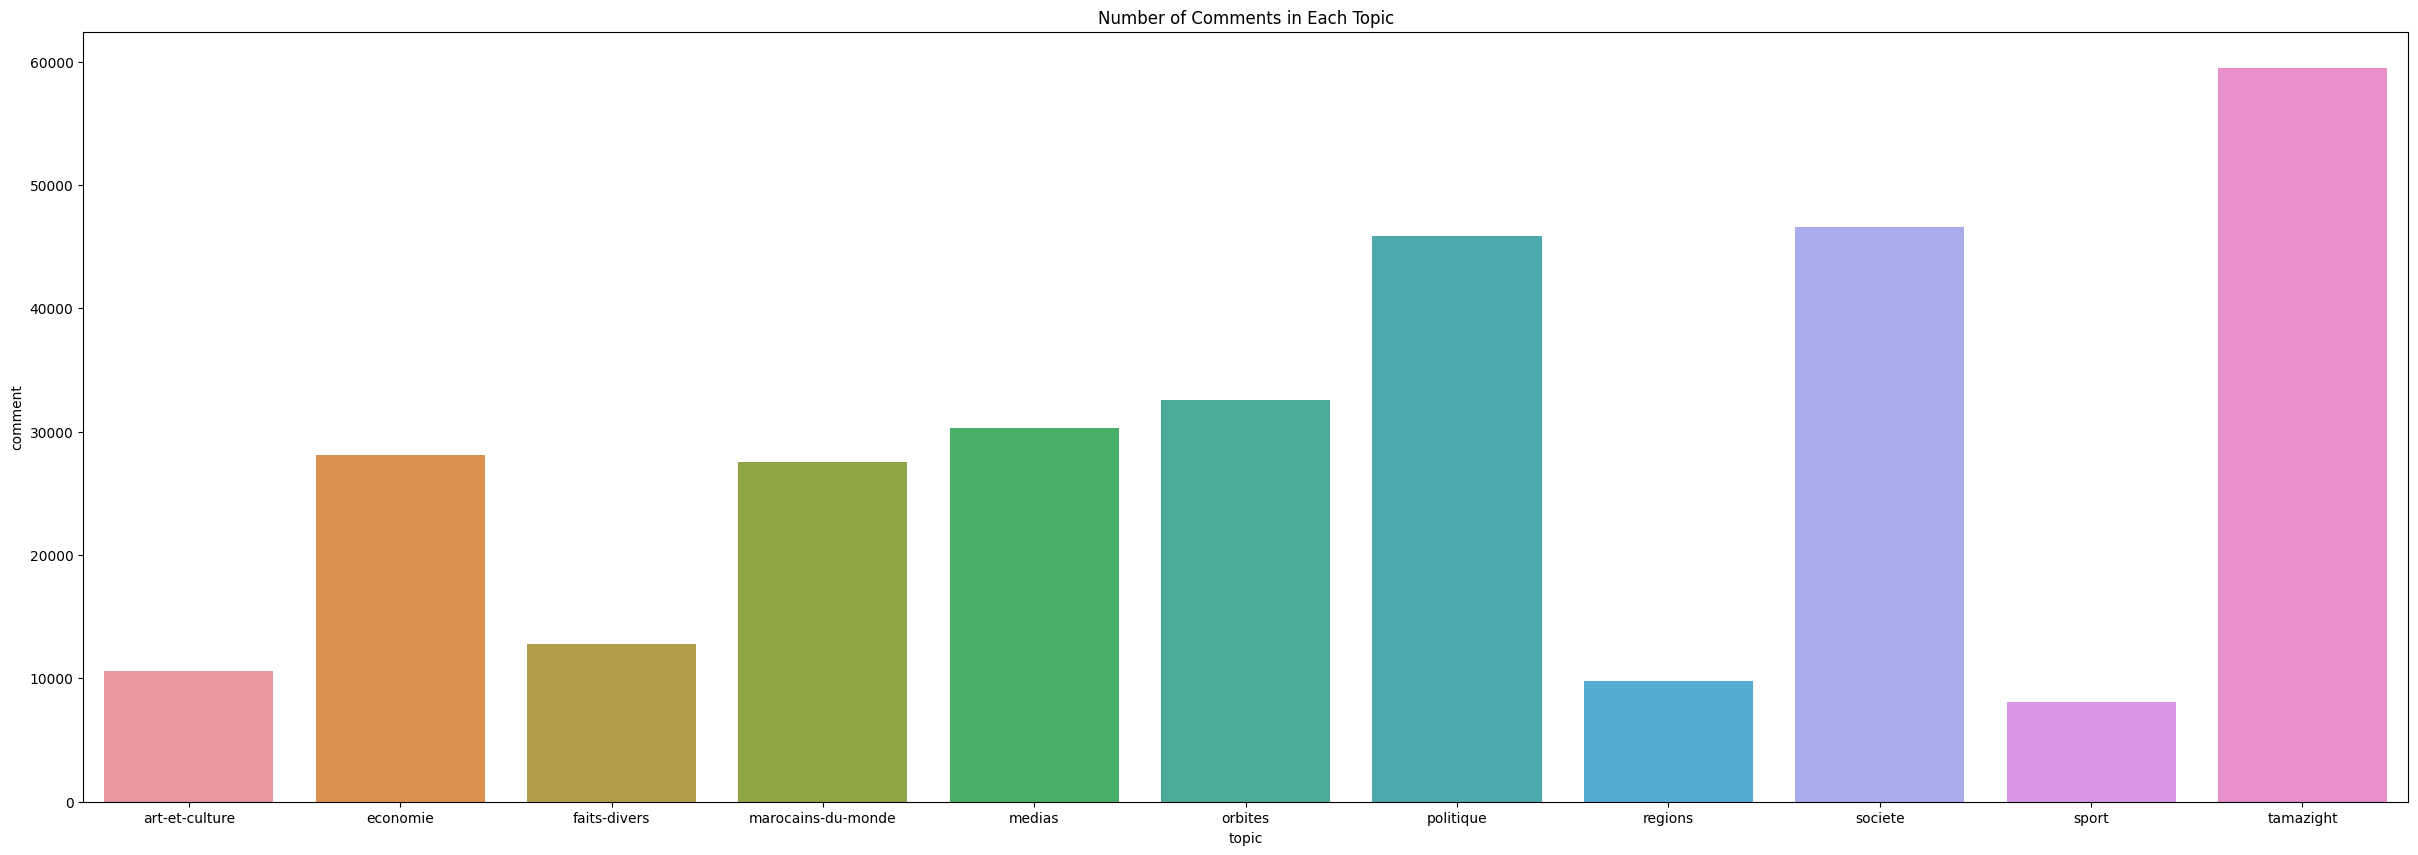

In [11]:
barPlot(comments, 'topic', 'comment', 'Number of Comments in Each Topic')

#**Average Score**

<Axes: title={'center': 'Average score of comments in each topic'}, xlabel='topic', ylabel='score'>

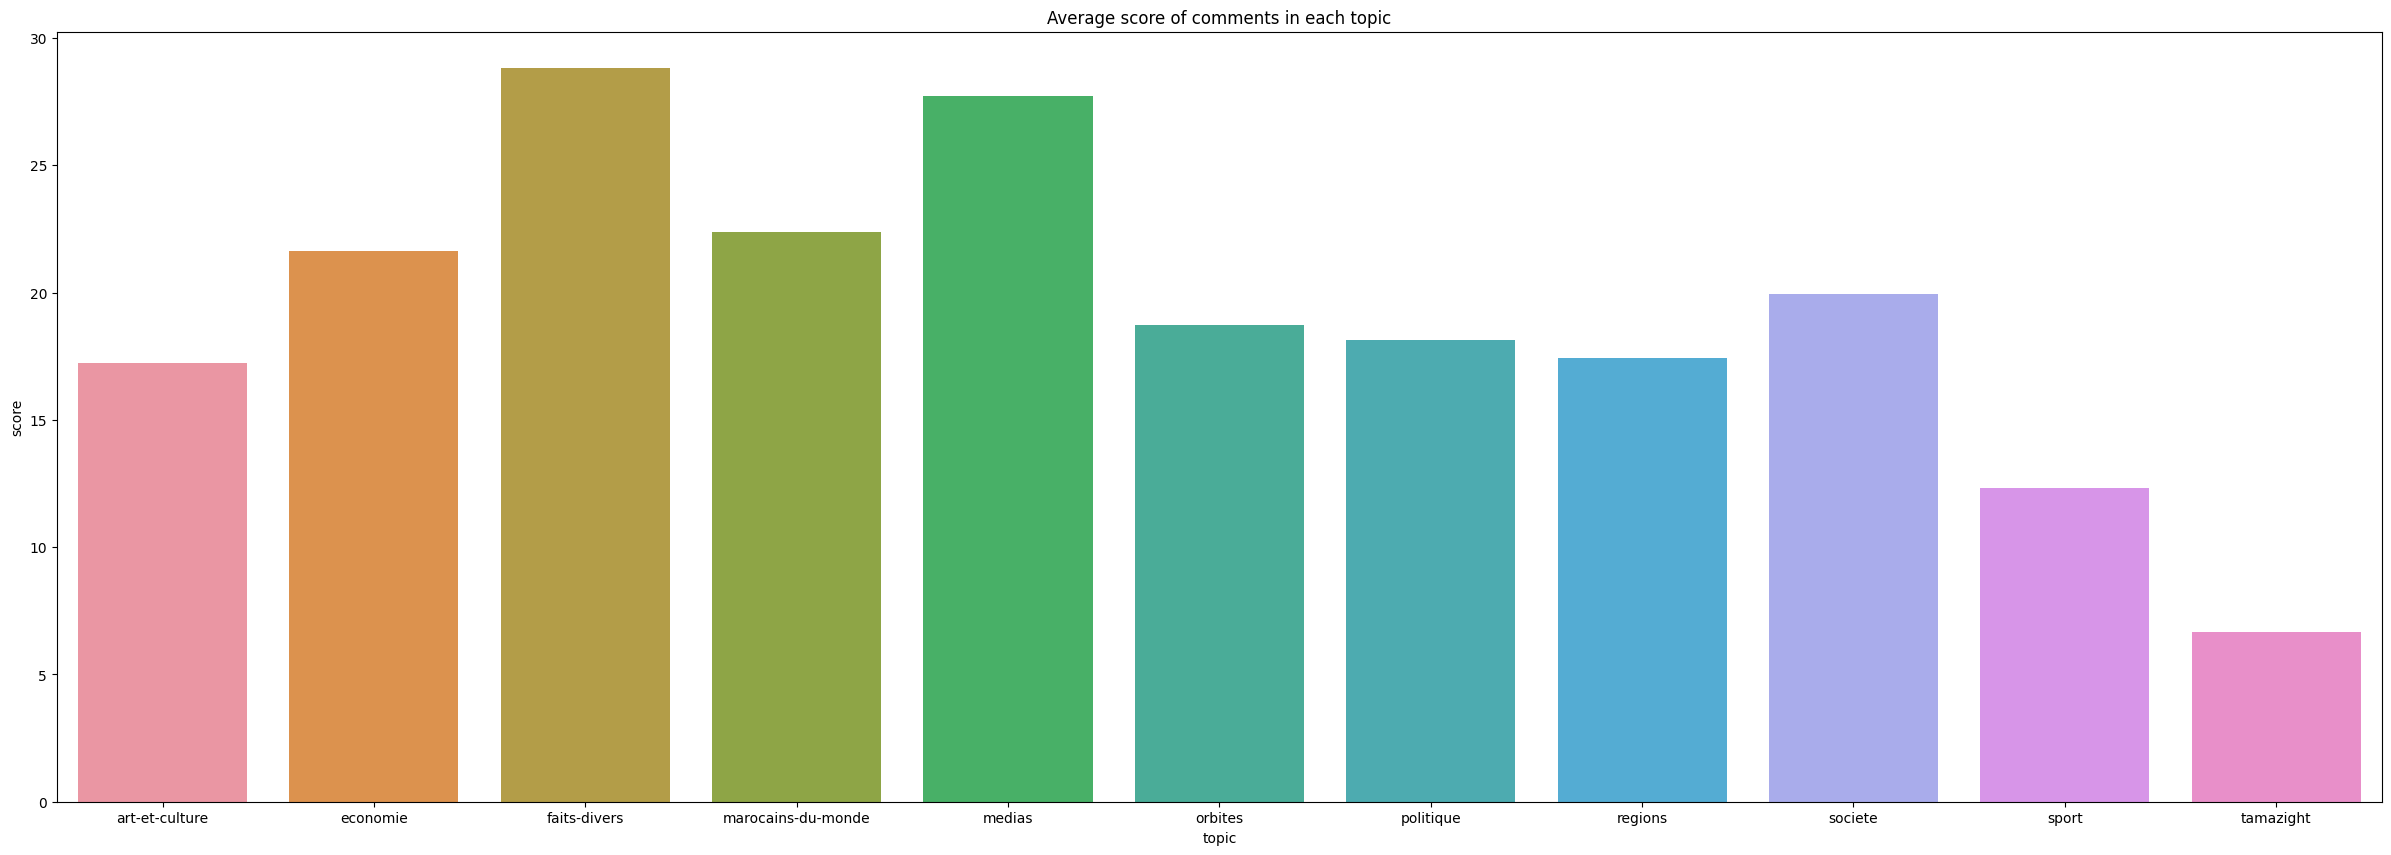

In [161]:
y = comments.groupby(by=comments['topic'])['score'].mean()
plt.figure(figsize=(30, 10))
plt.title('Average score of comments in each topic')
sns.barplot(x = y.index, y = y)

#**Top Frequent Words**

In [74]:
#Create a set of stopwords and punctuation to be removed
stopwords_punct = set(stopwords.words('arabic')+stopwords.words('english')+stopwords.words('french')+list(punctuation)+list('،')+list('``'))

In [75]:
def filterWords(text, stopwords):
  text_tokens = word_tokenize(text)
  return " ".join([word for word in text_tokens if not word in stopwords])
  #return text_tokens

In [76]:
stories['filtered'] = stories['story'].apply(lambda s: filterWords(s,stopwords_punct))
comments['filtered'] = comments['comment'].apply(lambda s: filterWords(s,stopwords_punct))

In [122]:
stories

,id,title,date,author,story,topic,filtered
0,3a7f2f5e04dd11eba84c646e69d991ea,"رسمياً .. الجولة الثانية من ""المفاوضات الليبية...",الجمعة 02 أكتوبر 2020 - 16:00,هسبريس - عبد الرحيم العسري,أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...,politique,أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية ال...
1,3b2663cc04dd11ebb293646e69d991ea,رئيس الحكومة يلتزم بحماية حقوق الشغيلة وإحداث ...,الجمعة 02 أكتوبر 2020 - 13:00,هسبريس - محمد الراجي (صور: منير محيمدات),شدد رئيس الحكومة، سعد الدين العثماني، على أن ا...,politique,شدد رئيس الحكومة، سعد الدين العثماني، الأزمة ا...
2,3bc8521c04dd11ebb541646e69d991ea,"هل تشكل ""المعارضة"" بديلا عن أحزاب الأغلبية في ...",الجمعة 02 أكتوبر 2020 - 09:00,هسبريس من الرباط,يكاد يكون هناك إجماع على فشل الحكومة في تدبير ...,politique,يكاد يكون إجماع فشل الحكومة تدبير جائحة كورونا...
3,3c5c092e04dd11eba4b7646e69d991ea,فرق مجلس النواب تستعد للدخول البرلماني الجديد,الجمعة 02 أكتوبر 2020 - 08:38,هسبريس من الرباط,عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...,politique,عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...
4,3d126e6404dd11eba070646e69d991ea,"الرباط تُنشِّط ""الدبلوماسية الروحية"" تجاه الأز...",الجمعة 02 أكتوبر 2020 - 05:00,هسبريس - مصطفى شاكري,تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...,politique,تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...
...,...,...,...,...,...,...,...
10995,285b115e04e911ebafee646e69d991ea,"64 إصابة بـ""كوفيد-19"" في صفوف الممرضين",الاثنين 13 يوليوز 2020 - 23:00,أيوب صدور من تطوان,قالت حركة الممرضين وتقنيي الصحة بالمغرب، إن عد...,societe,قالت حركة الممرضين وتقنيي الصحة بالمغرب، عدد ا...
10996,295312fa04e911ebaaa1646e69d991ea,حموشي يؤشّر على تعيينات بمصالح الأمن الوطني‎,الاثنين 13 يوليوز 2020 - 22:56,هسبريس من الرباط,أشّر المدير العام للأمن الوطني، عبد اللطيف حمو...,societe,أشّر المدير العام للأمن الوطني، عبد اللطيف حمو...
10997,2aadb58004e911eb98d9646e69d991ea,عدد الجلسات عن بعد بلغ 362 جلسة خلال 5 أيام,الاثنين 13 يوليوز 2020 - 18:15,هسبريس من الرباط,"قال المجلس الأعلى للسلطة القضائية إننا ""نسجل ب...",societe,قال المجلس الأعلى للسلطة القضائية إننا `` نسجل...
10998,2bd9849c04e911ebb053646e69d991ea,المغرب يسجل 191 إصابة جديدة مؤكدة بكورونا خلال...,الاثنين 13 يوليوز 2020 - 18:10,هسبريس من الرباط,كشفت وزارة الصحة، اليوم الاثنين، تسجيل 191 حال...,societe,كشفت وزارة الصحة، اليوم الاثنين، تسجيل 191 حال...


In [123]:
stories.to_csv('stories.csv')

In [78]:
comments

,postId,comment,score,topic,filtered
0,f06aa998054e11eba66e646e69d991ea,علينا الاهتمام ببيت الابحاث العلمية و المختبرا...,-9,art-et-culture,علينا الاهتمام ببيت الابحاث العلمية المختبرات،...
1,f06aa998054e11eba66e646e69d991ea,بيت الشعر في المغرب يحظى بالتقدير داخل وخارج أ...,5,art-et-culture,بيت الشعر المغرب يحظى بالتقدير داخل وخارج أرض ...
2,f06aa998054e11eba66e646e69d991ea,مبادرات مهمة يقوم بها بيت الشعر لصون الذاكرة ا...,4,art-et-culture,مبادرات مهمة يقوم بيت الشعر لصون الذاكرة الثقا...
3,f06aa998054e11eba66e646e69d991ea,شكرا لمكتب بيت الشعر في المغرب وعلى رأسه الشاع...,5,art-et-culture,شكرا لمكتب بيت الشعر المغرب وعلى رأسه الشاعر م...
4,f1cf1b9c054e11ebb718646e69d991ea,كل من عليها فان ويبقى وجه ربك ذو الجلال والإكر...,13,art-et-culture,عليها فان ويبقى وجه ربك الجلال والإكرام .... م...
...,...,...,...,...,...
311510,aa9adb7004f311ebb234646e69d991ea,انسان صادق وطني نمودج يقتدى به. ا قترحه سفيرا ...,27,marocains-du-monde,انسان صادق وطني نمودج يقتدى قترحه سفيرا متجولا...
311511,aa9adb7004f311ebb234646e69d991ea,"Jawad is an example of hard work, discipline a...",12,marocains-du-monde,Jawad example hard work discipline dedication ...
311512,aa9adb7004f311ebb234646e69d991ea,يقول المثل. من اين ذلك.ااشبل من ذاك الاسد انا ...,11,marocains-du-monde,يقول المثل اين ذلك.ااشبل الاسد انا كنت استاذا ...
311513,aa9adb7004f311ebb234646e69d991ea,د. جواد الخراز ممن يجمعون بين تواضع الكبار وشم...,13,marocains-du-monde,جواد الخراز يجمعون تواضع الكبار وشمولية المعرف...


In [124]:
comments.to_csv('comment.csv')

In [116]:
def frequentUni(col):
  text = ' '.join([word for word in col])
  words = word_tokenize(text)
  fd = FreqDist(words)
  top_10 = fd.most_common(10)
  fdist = pd.DataFrame(top_10, columns =['Word', 'Frequency'])
  return fdist

In [117]:
stories_freq = frequentUni(stories['filtered'])

In [121]:
stories_freq

,Word,Frequency
0,``,158355
1,خلال,10860
2,المغرب,8810
3,المغربية,8327
4,أنه,6672
5,كورونا,6032
6,الأمازيغية,5466
7,المغربي,5230
8,محمد,5133
9,حالة,5048


In [125]:
stories_freq.to_csv('stories_freq.csv')

In [119]:
comments_freq = frequentUni(comments['filtered'])

In [120]:
comments_freq

,Word,Frequency
0,ان,102709
1,الله,85707
2,...,70887
3,المغرب,69766
4,``,53452
5,..,52879
6,الى,48942
7,او,41619
8,المغاربة,31855
9,يجب,28619


In [126]:
comments_freq.to_csv('comments_freq.csv')